### prediksi banyaknya produksi karet

anggota kelompok 1:

- Muhammad Rendy [121450045]
- Muhammad Faqih [121450120]
- Devina anin [121450084]
- Tarisah [121450141]

In [1]:
!pip install -U scikit-fuzzy

In [16]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import numpy as np
import matplotlib.pyplot as plt

### Membuat variabel input

In [17]:
luas_lahan = ctrl.Antecedent(np.arange(0, 5001, 1), 'luas_lahan')
penggunaan_pupuk = ctrl.Antecedent(np.arange(0, 201, 1), 'penggunaan_pupuk')

### Membuat variabel output

In [18]:
jumlah_produksi_karet = ctrl.Consequent(np.arange(0, 201, 1), 'jumlah_produksi_karet')

### Mendefinisikan fungsi keanggotaan untuk masing-masing variabel linguistik

In [19]:
luas_lahan['rendah'] = fuzz.trimf(luas_lahan.universe, [0, 0, 500])
luas_lahan['sedang'] = fuzz.trimf(luas_lahan.universe, [250, 1000, 2000])
luas_lahan['besar'] = fuzz.trimf(luas_lahan.universe, [1500, 5000, 5000])

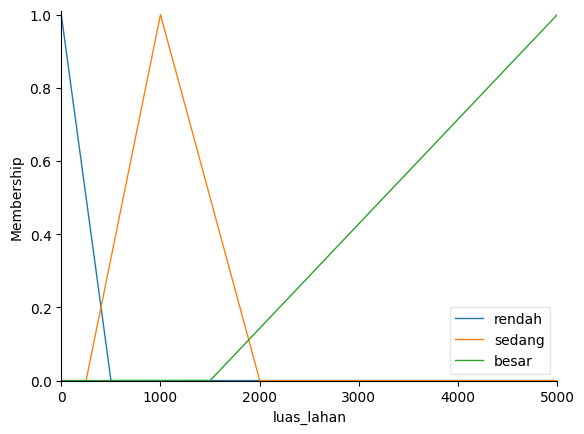

In [29]:
luas_lahan.view()

In [20]:
penggunaan_pupuk['rendah'] = fuzz.trimf(penggunaan_pupuk.universe, [0, 0, 50])
penggunaan_pupuk['sedang'] = fuzz.trimf(penggunaan_pupuk.universe, [20, 65, 90])
penggunaan_pupuk['tinggi'] = fuzz.trimf(penggunaan_pupuk.universe, [80, 150, 200])

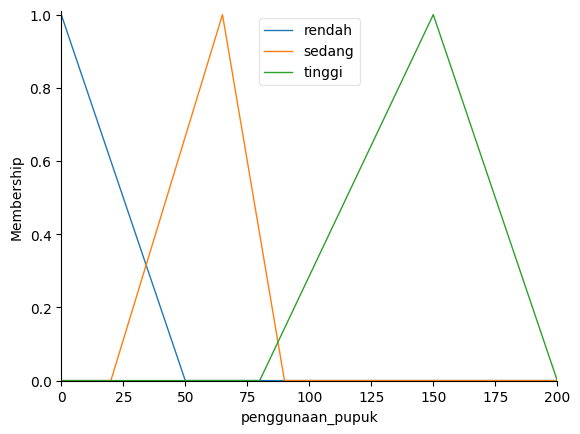

In [30]:
penggunaan_pupuk.view()

In [31]:
jumlah_produksi_karet['rendah'] = fuzz.trimf(jumlah_produksi_karet.universe, [0, 0, 100])
jumlah_produksi_karet['sedang'] = fuzz.trimf(jumlah_produksi_karet.universe, [60, 120, 180])
jumlah_produksi_karet['tinggi'] = fuzz.trimf(jumlah_produksi_karet.universe, [140, 200, 200])

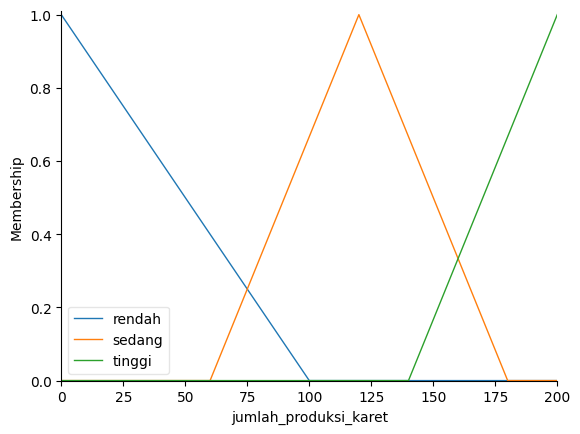

In [32]:
jumlah_produksi_karet.view()

### Aturan fuzzy


In [22]:
rule1 = ctrl.Rule(luas_lahan['rendah'] & penggunaan_pupuk['rendah'], jumlah_produksi_karet['rendah'])
rule2 = ctrl.Rule(luas_lahan['sedang'] & penggunaan_pupuk['sedang'], jumlah_produksi_karet['sedang'])
rule3 = ctrl.Rule(luas_lahan['besar'] & penggunaan_pupuk['tinggi'], jumlah_produksi_karet['tinggi'])

### Membuat sistem kontrol

In [23]:
jumlah_produksi_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
jumlah_produksi_sim = ctrl.ControlSystemSimulation(jumlah_produksi_ctrl)

### Masukkan input

In [24]:
jumlah_produksi_sim.input['luas_lahan'] = 1300
jumlah_produksi_sim.input['penggunaan_pupuk'] = 80

### Menghitung output

In [25]:
jumlah_produksi_sim.compute()

### Menampilkan hasil

Hasil produksi karet: 120.0000000000002


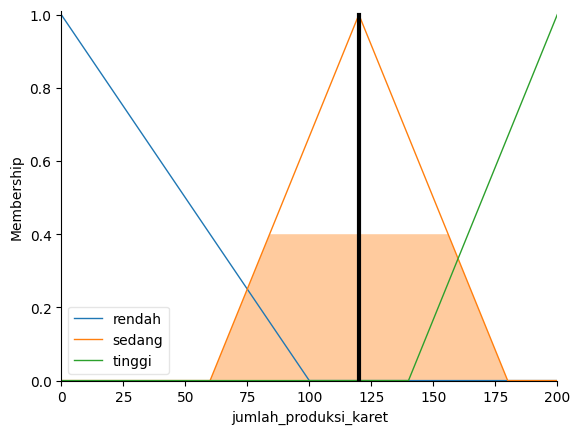

In [28]:
print("Hasil produksi karet:", jumlah_produksi_sim.output['jumlah_produksi_karet'])
jumlah_produksi_karet.view(sim=jumlah_produksi_sim)

plt.show()